# Linear Regression 

When we were working on train and test split of the data, we already got acquantied with [**sklearn**](http://scikit-learn.org/dev/index.html) (also, **scikit-learn**) library. It contains all you need to create, evaluate and use various machine learning models. Linear Regression - the first machine learning algorithms to study - is, of cause, implemented there as well.  

*Note*: for regression analysis people also use [**statsmodels**](http://statsmodels.sourceforge.net/) package as it contains more statistical information, but we will stick to **sklearn** for now. 

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

## Boston Housing Dataset

To build our first linear regression we will use one of famous datasets in data science - the Boston Housing Dataset. It is based on information collected by the U.S. Census Service and describes housing situation in the area around Boston, Massachusetts.

For your reference, here is the legend.

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percent lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's USD

Let us read the data.

In [5]:
data = pd.read_csv('Boston_Housing_Data.csv')

Explore the data

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
#YOUR CODE GOES HERE

In [10]:
#YOUR CODE GOES HERE

## Cleaning

How many data values are missing?

In [11]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

What are your thoughts on strategy of cleaning the data? What do you need to know to make a decision?

In [12]:
data.isna().sum()[data.isna().sum() > 0].index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [13]:
my_dict = {}
for i in data.isna().sum()[data.isna().sum() > 0].index:
    my_dict[i] = data[data[i].isna()].index
    
my_dict

{'CRIM': Int64Index([ 53, 115, 183, 191, 192, 196, 229, 236, 241, 262, 288, 302, 369,
             393, 394, 409, 426, 430, 460, 465],
            dtype='int64'),
 'ZN': Int64Index([ 92, 118, 133, 146, 157, 167, 186, 205, 210, 238, 266, 301, 303,
             330, 332, 350, 355, 375, 427, 458],
            dtype='int64'),
 'INDUS': Int64Index([ 36,  47,  51, 123, 133, 147, 148, 173, 177, 219, 245, 292, 297,
             305, 344, 359, 406, 453, 458, 466],
            dtype='int64'),
 'CHAS': Int64Index([  6,   9,  14,  43, 119, 152, 206, 240, 245, 254, 294, 367, 376,
             388, 401, 442, 450, 465, 479, 482],
            dtype='int64'),
 'AGE': Int64Index([ 74, 103, 126, 138, 150, 155, 163, 173, 193, 215, 233, 281, 286,
             316, 355, 368, 423, 429, 451, 505],
            dtype='int64'),
 'LSTAT': Int64Index([  4,  35,  73,  79,  87, 116, 207, 226, 228, 271, 277, 349, 350,
             376, 383, 407, 440, 441, 473, 501],
            dtype='int64')}

In [14]:
my_dict['ZN'].intersection(my_dict['INDUS'])

Int64Index([133, 458], dtype='int64')

In [15]:
my_list = []
for _, index in my_dict.items():
    my_list.extend(index.astype(int))

In [16]:
for i in my_list:
    if my_list.count(i)>1:
        print(i)

465
133
350
355
458
133
173
245
458
245
376
465
173
355
350
376


In [17]:
non_unique = [i for i in my_list if my_list.count(i)>1]
non_unique

[465,
 133,
 350,
 355,
 458,
 133,
 173,
 245,
 458,
 245,
 376,
 465,
 173,
 355,
 350,
 376]

In [18]:
from collections import Counter
Counter(non_unique)

Counter({465: 2, 133: 2, 350: 2, 355: 2, 458: 2, 173: 2, 245: 2, 376: 2})

Is it reasonable to just remove missing values? Why?

No, because by removing missing values, data can be more corrupted. Unless there is more than one missing value for a given row, it should not be deleted.

Now, let's implement the strategy you chose. 

In [19]:
#YOUR CODE GOES HERE

*(optional block to read)*

Alternatively, there are techniques that allows you to predict the missing values. It is good to know for future, but don't worry abou it for now.

In [20]:
from fancyimpute import IterativeImputer as MICE

ModuleNotFoundError: No module named 'fancyimpute'

In [21]:
data_2 = MICE().fit_transform(data)

NameError: name 'MICE' is not defined

In [22]:
data_2

NameError: name 'data_2' is not defined

In [23]:
data_2 = pd.DataFrame(data=data_2, columns=data.columns)

NameError: name 'data_2' is not defined

In [24]:
data_2.info()

NameError: name 'data_2' is not defined

*(end of optional block)*

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Quick EDA of Dependent Variable

In [ ]:
#YOUR CODE GOES HERE

Let's remove some outliers.

In [ ]:
#YOUR CODE GOES HERE

How does the boxplot look now?

In [ ]:
#YOUR CODE GOES HERE

## Variables Correlation

How do we plot one variable versus the other to explore correlation? Let's try **DIS** and **MEDV**.

In [ ]:
#YOUR CODE GOES HERE

Overall there are 14 variables (13 independent, 1 dependent)in the dataset. Let's use **pandas** to check out the correlations between the different variables.

In [34]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


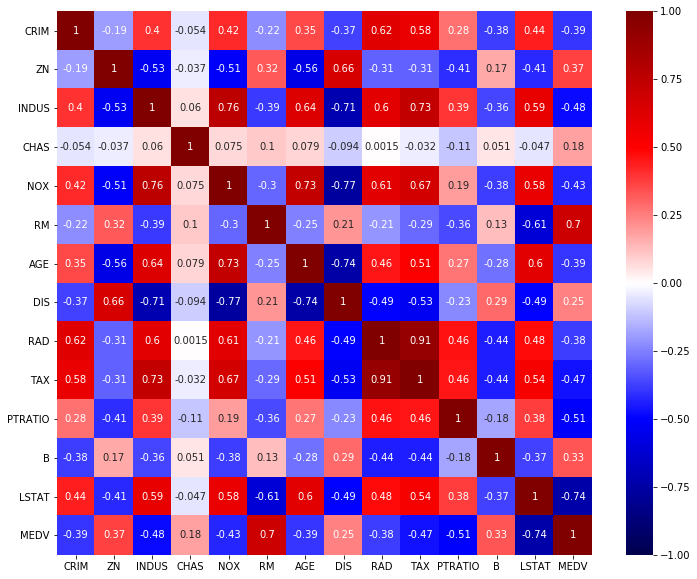

In [35]:
# example of a better corr matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Remember scatterpots and pairplots that plot all of the variable-to-variable relations at once. Let's build one and have another view on correlation between our potential predictors.

In [ ]:
sns.pairplot(data, height=1.2, aspect=1.25);

What variables are highly correlated? Provide examples of positive and negative correlations.  

The thing to look for is which of our predictors are highly correlated with our **target variable MEDV**.  If there is a correlation,  these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable.

## Simple Linear Regression 

#### Train-test split

This should be familiar. Why do we need train and test split?

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, ['DIS']], 
                                                    data.loc[:, 'MEDV'], 
                                                    test_size=.3, random_state = 22)

#### Linear Regression

First let's try a simple linear regression model using only one feature - DIS (weighted distances to five Boston employment centres). Mathematically, we want to find $\beta_0, \beta_1$ such that
$ \hat{Y} = \beta_0 + \beta_1X_1$.

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
linear_regression.intercept_

18.03489613877713

In [29]:
linear_regression.coef_

array([1.11408673])

To understand how much variance of the data our model explains, you can use **score()** function. Score here is nothing but **R<sup>2</sup>**. It shows the estimated percentage of the variance in our dependent variable **MEDV** that can be explained by our regression model (in this case, our model uses one independent variable **DIS**). The formula for ***R<sup>2</sup>*** is 
$R^2 = 1 - \frac{\text{SSE}}{\text{SST}}$, where SSE is the sum of squared errors/residuals and SST is the variance of our dependent variable. <br><br> Let's see the value for **R<sup>2</sup>** for train and test sets.

In [30]:
linear_regression.score(X_train, y_train)

0.07311263947945035

In [31]:
linear_regression.score(X_test, y_test)

0.03662967663760208

What can you tell about the results?

Type here

Since we have only one predictor for now, we can visualize our regression. Do not worry about predictions for now, we will cover them below.

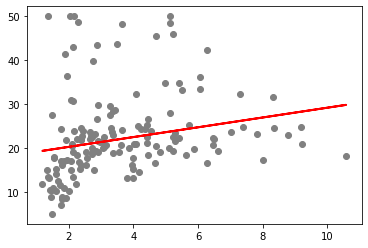

In [32]:
predictions = linear_regression.predict(X_test) 

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.show()

Now, let's add more data, i.e. another variable - **RM** (average number of rooms per dwelling). 

In [ ]:
X_train, X_test, y_train, y_test = #YOUR CODE GOES HERE

In [ ]:
linear_regression_2 = #YOUR CODE GOES HERE
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

Did your ***R<sup>2</sup>*** go up? Why is that?

Type here

Let's build the full model. 

In [ ]:
X_train, X_test, y_train, y_test = #YOUR CODE GOES HERE

In [ ]:
linear_regression_full = #YOUR CODE GOES HERE
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

At this point we have fit our linear regression model with X1 as our only feature.  How do we know if our model is good or not?  We will talk more about this in the coming days, but for now note that we can "score" our model within sklearn:

In [ ]:
#YOUR CODE GOES HERE

In [ ]:
#YOUR CODE GOES HERE

What can you say about the model now? How do you interpret the results?

In [ ]:
Type here

#### Predictions and Evaluations

Let's use the first model to predict median home value of a single observation. Let's pick the first one from our test set. This is a useful exercise to see that the formula is working.  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, ['DIS']], 
                                                    data.loc[:, 'MEDV'], 
                                                    test_size=.3, random_state = 22)

#### a) single prediction

You have to convert the data frame object to array for that and reshape it, but do not worry about this implementational detail for now.

In [ ]:
linear_regression.predict(np.array(X_test.iloc[0, :]).reshape(1, -1))

Let's compare the answer we got with **predict()** function to hand-canculated value. Do they agree? Does it make sense for you what **predict()** function is doing?

In [ ]:
linear_regression.intercept_ + linear_regression.coef_ * X_test.iloc[0, :]

#### b) test set

Let's see if this is true for the whole test set.

In [ ]:
predictions = linear_regression.predict(X_test) 

In [ ]:
np.array(linear_regression.intercept_ + linear_regression.coef_ * X_test).reshape(1, -1) == predictions

What about ***R<sup>2</sup>*** on test set? Can we calculate it using the formula?

In [ ]:
1 - ((predictions-y_test)**2).sum()/((y_test.mean()-y_test)**2).sum()

In [ ]:
linear_regression.score(X_test, y_test)

Now, let's talk thousands of dollars instead of 'unitless' ***R<sup>2</sup>***. We can calculate ***RMSE*** (Root Mean Squared Error) and ***MAE*** (Mean Absolute Error). We can use pre-build functions or calculate it ourselves. Let's do both to understand how it works. 

In [ ]:
mean_squared_error(y_true = y_test, y_pred = predictions, squared=False)

In [ ]:
RMSE = np.sqrt(((predictions-y_test)**2).mean())
RMSE

In [ ]:
mean_absolute_error(y_true = y_test, y_pred = predictions)

In [ ]:
MAE = (abs(predictions-y_test)).mean()
MAE

#### Plotting Residuals 

Now, let's plot residuals of a full model. They should be randomly distributed, i.e. should not contain a clear pattern. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, ['DIS']], 
                                                    data.loc[:, 'MEDV'], 
                                                    test_size=.3, random_state = 22)

In [ ]:
linear_regression_full = #YOUR CODE GOES HERE
#YOUR CODE GOES HERE

In [ ]:
predictions = #YOUR CODE GOES HERE

In [ ]:
residuals = predictions-y_test

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, residuals)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);